# Validación Cluster

En este cuaderno veremos algunas consideraciones a tener en cuenta mientras hacemos la agrupación de datos. La idea es cuestionarnos acerca de lo siguiente:

***
* **¿Vale la pena agrupar los datos?**
* **¿Cuantos cluster son necesarios?**
***

Recuerde que este es un modelo no supervisado, los datos están mostrandonos como se estan agrupando y nosotros reconocemos su naturaleza. La idea es evitar forzar la información y permitirnos una interpretaciuón adecuada de los resultados que arroja la implementación de estos modelos.


##  Antes de agrupar

Como vimos en las anteriores clases, la agrupación se logra a través de análisis de distancias entre los datos, ya bien sea un método jerárquico o de partición se soporta en una distancia entre individuos, grupos y grupos e individuos. Así mismo debemos ser conscientes que los factores de escala de las diferentes variables pueden afectar el resultado final, por eso es importantisimo que antes del ejercicio se haga una estandarización de los datos:

* **Z-puntaje**: es un requisito general para muchos algoritmos de aprendizaje automático. Intuitivamente, podemos pensar en el descenso  gradiente como un ejemplo destacado (regresión logística, SVM, perceptrones, redes neuronales, etc.); con variables en diferentes escalas, ciertas ponderaciones pueden actualizarse más rápido que otras y eso nos traería problemas.

$$X_{est}= \frac{x_i - media(x)}{desvest(x)}$$

* **Min-Max**: Un enfoque alternativo para la estandarización del puntaje Z es el llamado escalado Min-Max, en este enfoque, los datos se escalan a un rango fijo, generalmente de 0 a 1. El costo de tener este rango limitado, en contraste con la estandarización, es que terminaremos con desviaciones estándar más pequeñas, lo que puede suprimir el efecto de valores atípicos. Una escala mínima-máxima se realiza normalmente mediante la siguiente ecuación:

$$ X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}}$$

***

**¿Estandarización de puntaje Z o escala Min-Max?**

***

Depende de la aplicación.

Por ejemplo, en los análisis de agrupamiento, la estandarización puede ser especialmente crucial para comparar similitudes entre características basadas en ciertas medidas de distancia. Otro ejemplo destacado es el Análisis de componentes principales, donde generalmente preferimos la estandarización sobre la escala Min-Max, ya que estamos interesados en los componentes que maximizan la varianza (dependiendo de la pregunta y si el PCA calcula los componentes a través de la matriz de correlación en lugar de la matriz de covarianza; pero más sobre PCA en mi artículo anterior ).

Sin embargo, esto no significa que el escalado Min-Max no sea útil en absoluto. Una aplicación popular es el procesamiento de imágenes, donde las intensidades de píxeles deben normalizarse para ajustarse a un cierto rango (es decir, de 0 a 255 para el rango de color RGB). Además, el algoritmo de red neuronal típico requiere datos en una escala de 0-1.

Veamos los dos escalados en Python:

In [1]:
import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [2]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [3]:
df_std

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,

In [4]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


In [5]:
df_minmax

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336],
       [0.80789474, 0.28063241],
       [0.81315789, 0.14624506],
       [0.71578947, 0.19565217],
       [0.97894737, 0.19565217],
       [0.88157895, 0.22332016],
       [0.68421053, 0.21146245],
       [0.86052632, 0.23320158],
       [0.73684211, 0.16403162],
       [0.83157895, 0.16798419],
       [0.68684211, 0.46640316],
       [0.79736842, 0.17588933],
       [0.5       , 0.60474308],
       [0.70526316, 0.22134387],
       [0.47894737, 0.16996047],
       [0.65      , 0.21146245],
       [0.53157895, 0.25889328],
       [0.62105263, 0.20355731],
       [0.59736842, 0.19367589],
       [0.74736842, 0.22924901],
       [0.78684211, 0.18577075],
       [0.

In [6]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


## Tendencia del cluster

Ahora vamos a cuestionarnos lo siguiente:

***
¿Vale la pena agrupar los datos?
***

Existe la posibilidad de que nos encontremos con datos tan enloquecidos que al observalos no se reconozca ningún tipo de agrupación entre ellos, sin embargo, hay algunas técnicas que nos permiten evaluar si exixten clusteres en la información.  A continuación, se muestran dos métodos que ayudan a identificar casos en los que hacer agrupamientos no tiene sentido.


### Estadístico de Hopkins


* Extraer una muestra de $n$ observaciones $(p_1,\dots ,p_n)$ del conjunto de datos.

* Para cada observación $p_i$ seleccionada, encontrar la observación vecina más cercana $p_j$ y calcular la distancia entre ambas, $x_i=dist(pi,pj)$.

* Simular un conjunto de datos de tamaño $n$: $(q_1,\dots, q_n)$ extraídos de una distribución uniforme con la misma variación que los datos originales.

* Para cada observación simulada $q_i$, encontrar la observación vecina más cercana $q_j$ y calcular la distancia entre ambas, $y_i=dist(q_i,q_j)$.

* Calcular el estadístico Hopkins $(H)$ como la media de las distancias de vecinos más cercanos en el set de datos simulados, dividida por la suma de las medias de las distancias vecinas más cercanas del set de datos original y el simulado.

$$ H = \frac{\sum^n_{i=1}x_i}{\sum^n_{i=1}x_i + \sum^n_{i=1}y_i}$$

Valores de $H$ en torno a 0.5 indican que $\sum^n_{i=1}x_i$ y $\sum^n_{i=1}y_i$ son muy cercanos el uno al otro, es decir, que los datos estudiados se distribuyen uniformemente y que por lo tanto no tiene sentido aplicar clustering. Cuanto más se aproxime a 0 el estadístico H, más evidencias se tienen a favor de que existen agrupaciones en los datos y de que, si se aplica clustering correctamente, los grupos resultantes serán reales. 

In [28]:
#!pip install pyclustertend

In [15]:
from sklearn import datasets
from pyclustertend import hopkins
X = datasets.load_iris().data
std_scale = preprocessing.StandardScaler().fit_transform(X)
std_scale

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [16]:
hopkins(std_scale,150)

0.1792996669468908

## Tendencia visual de cluster

VAT es un método visual que permite identificar la tendencia de cluster.

* Se calcula una matriz de distancias euclídeas entre todos los pares de observaciones.

* Se reordena la matriz de distancias de forma que las observaciones similares están situadas cerca unas de otras (ordered dissimilarity matrix).

* Se representa gráficamente la matriz de distancias ordenada, empleando un gradiente de color para el valor de las distancias. Si existen agrupaciones subyacentes en los datos se forma un patrón de bloques cuadrados.



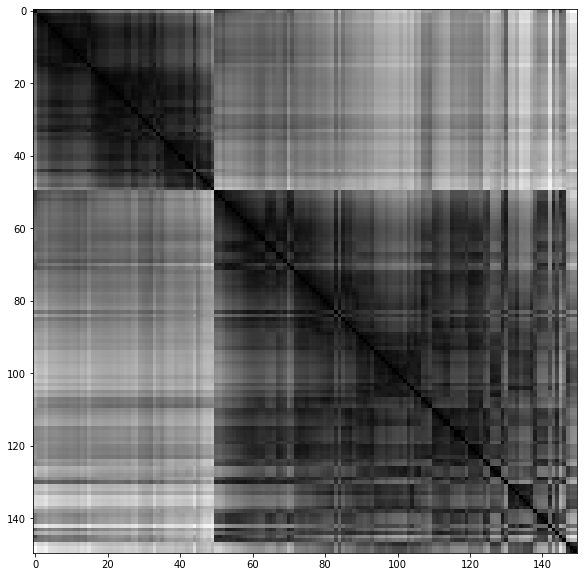

In [17]:
from sklearn import datasets
from pyclustertend import vat
from sklearn.preprocessing import scale
X = scale(datasets.load_iris().data)
vat(X)

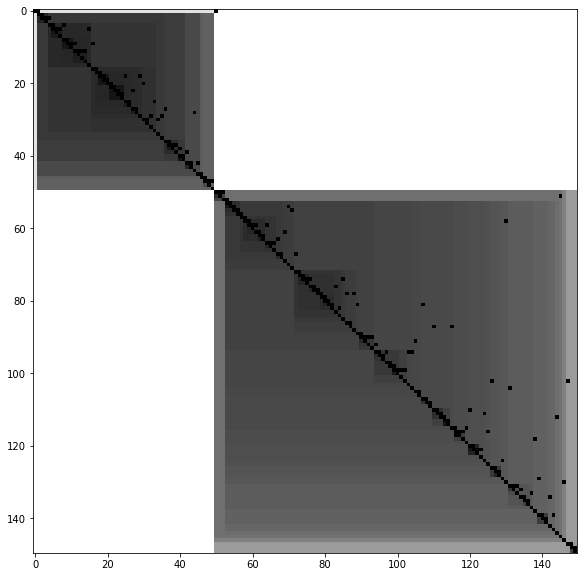

In [18]:
from sklearn import datasets
from pyclustertend import ivat
from sklearn.preprocessing import scale
X = scale(datasets.load_iris().data)
ivat(X)

## ¿Cuantos clusters?

Como se ha visto en varios ejemplos anteriores, el número de clusters depende del problema, de la naturaleza de los datos y de las intenciones del investigador; constituye uno de los pasos más arduos en el momento de hacer agrupaciones y en el caso de los algoritmos basados en particiones, este valor debe establecerse previamente. La pregunta obvia es:

***
**¿Cómo determinar la cantidad óptima de cluster?**
***

No existe una forma única de responder a esta pregunta, como mencionamos arriba, depende del problema, los datos y el investigador. Sin embargo, hay algunos métodos que, analizando la diferencia entre grupos y la similitud de los individuos de un mismo grupo, permiten dar una luz para responder esta pregunta. En lo que sigue, hablaremos de dichos métodos y explicaremos como desplegarlos en Python.

### Método ELBOW

El método Elbow calcula la varianza total intra-cluster en función del número de clusters y escoge como óptimo aquel valor a partir del cual añadir más clusters apenas consigue mejoría.



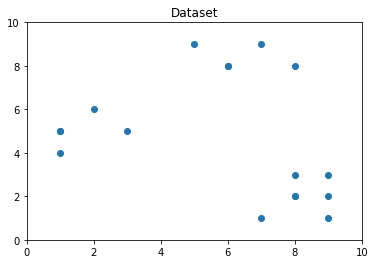

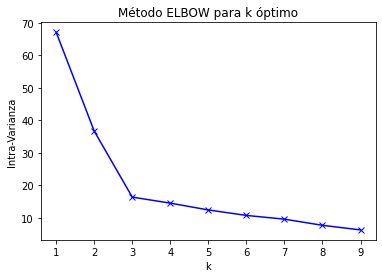

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 8, 7, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 9, 8, 9, 8, 1, 2, 1, 2, 3, 2, 3])

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
intravar = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    intravar.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) )

# Plot the elbow
plt.plot(K, intravar, 'bx-')
plt.xlabel('k')
plt.ylabel('Intra-Varianza')
plt.title('Método ELBOW para k óptimo')
plt.show()



Observe que en el código se calcularon diferentes agrupaciones para cada valor $k$ entre 1 y 9. Así mismo, la forma de determinar el valor de Intra Varianza por grupo fue a partir de distancias según el siguiente cálculo:

$$\text{IV}(k)=\frac{1}{n}\sum\limits_{i=1}^{n}||x_i-c_i||$$

donde $c_i$ es el centro del cluster al que pertenece el elemento i-ésimo.

Cuando agregar un cluster no representa cambios significativos en este cálculo (identificamos el codo), decimos que el valor de $k$ optimo es aquél. En el ejemplo anterior el valor óptimo de $k$ es 3.

### Método Silueta Media

Se usa el coeficiente de silueta, un valor que mide que tan buena es la asignación a una observación, comparando su similitud con el resto de observaciones de su cluster. Se calcula de la siguiente manera:

* Se calcula el promedio de las distancias entre la observación $j$ y el resto de observaciones que pertenecen al mismo cluster, lo denominamos $a_j$.¿Que esperamos?

* Calcular la distancia promedio entre la observación $j$ y el resto de clusters. Para esto se determina la media de las distancias de $j$ con todos los elementos del cluster estudiado.

* Identificar como $b_j$ a la menor de las distancias promedio entre $j$ y el resto de clusters, es decir, la distancia al cluster más próximo.

* Calcular el valor de silhouette como:

$$ s_j = \frac{b_j - a_j}{max(a_j, b_j)}$$




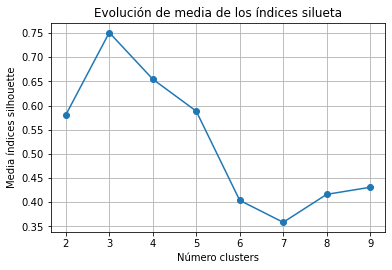

In [22]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 10)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(X)
    promsilueta = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(promsilueta)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silueta")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');
plt.grid()
plt.show()